In [12]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import altair as alt

import statsmodels.stats.api as sms
from scipy.stats import shapiro

import warnings
warnings.filterwarnings('ignore')

In [2]:
feature_names = ['Degree', 'Clustering Coefficient', 'Betweenness', 'Closeness', 'Shortest Path', 'Eigenvector', 'E In', 
                 'E Out', 'E In Over E Out', 'ODF', 'Expansion', 'Cut Ratio', 'Conductance', 'Normalised Cut', 
                 'Triangle Participation']

## Infomap Final Test

Here we explore the results from the final test of the methodology before the real experiments. First, we look at plots of the entropies and the stability cutoff for each graph.

Then, we look at the permutation importances for each node feature.

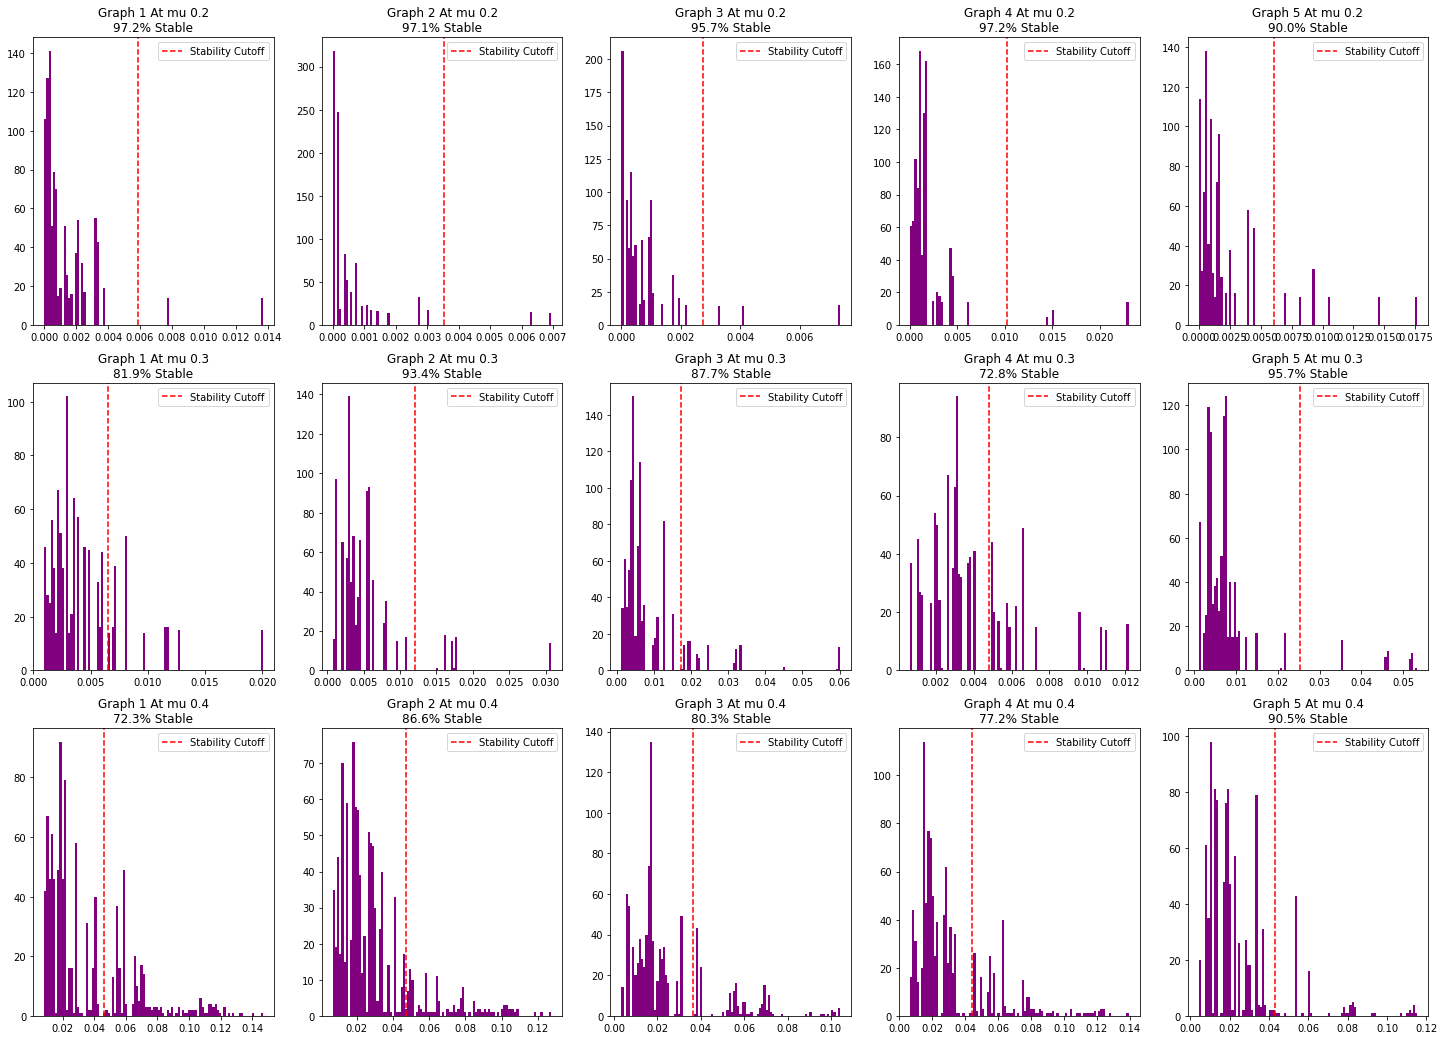

In [3]:
fig = plt.figure(figsize=(25,18))
count = 1
for mu in [2, 3, 4]:
    for graph in [1, 2, 3, 4, 5]:
        ax = fig.add_subplot(3,5,count)
        entrops = pd.read_csv('Community_Data/Infomap/Node_Entropies/graph_0{0}_mu_0_{1}_entropies.csv'.format(graph, mu), 
                              index_col=0)
        entropy_values = np.array(entrops['Entropy'])
        plt.hist(entropy_values, bins=100, color='purple')
        with open('Community_Data/Infomap/Results/mu_0_{0}/graph_0{1}/results'.format(mu, graph), 'rb') as f:
            results = pickle.load(f)
        cutoff = results['Stability Cutoff']
        title = 'Graph {0} At mu 0.{1}'.format(graph, mu)
        stab_prop = results['Stable Nodes']*100 / (results['Stable Nodes'] + results['Unstable Nodes'])
        stab_title = '{0}% Stable'.format(stab_prop)
        ax.set_title(title + '\n' + stab_title)
        plt.axvline(x = cutoff, c='r', linestyle='--', label='Stability Cutoff')
        plt.legend()
        count += 1

In [4]:
for mu in [2, 3, 4]:
    mu_feature_importances = {'Metric': [], 'Value': []}
    for graph in [1, 2, 3, 4, 5]:
        with open('Community_Data/Infomap/Results/mu_0_{0}/graph_0{1}/results'.format(mu, graph), 'rb') as f:
            results = pickle.load(f)
        perm_importances = results['Feature Importances']
        for feat, val in perm_importances.items():
            mu_feature_importances['Metric'].append(feat)
            mu_feature_importances['Value'].append(val)
    mu_feature_importances = pd.DataFrame(data=mu_feature_importances)
    error_bars = alt.Chart(mu_feature_importances).mark_errorbar(extent='ci').encode(
      x=alt.X('Value:Q', scale=alt.Scale(zero=False)),
      y=alt.Y('Metric:N')
    )


    mean_points = alt.Chart(mu_feature_importances).mark_point(filled=True, color='black').encode(
      x=alt.X('Value:Q', aggregate='mean'),
      y=alt.Y('Metric:N'),
    )
    
    median_points = alt.Chart(mu_feature_importances).mark_point(filled=True, color='red').encode(
      x=alt.X('Value:Q', aggregate='median'),
      y=alt.Y('Metric:N'),
    )

    final_plot = (error_bars + mean_points + median_points).properties(
        title='Mu 0.{0}'.format(mu)
    )

    final_plot.display()

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

In [5]:
shapiro_test = {}
for i, met in enumerate(mu_feature_importances['Metric']):
    if met in shapiro_test.keys():
        shapiro_test[met].append(mu_feature_importances['Value'][i])
    else:
        shapiro_test[met] = [mu_feature_importances['Value'][i]]
for met, val_list in shapiro_test.items():
    test_result = shapiro(val_list)
    print(met + ': Statistic =', test_result.statistic, ' P_Value =', test_result.pvalue)
    print('')

Degree: Statistic = 0.6945557594299316  P_Value = 0.008392550982534885

Clustering Coefficient: Statistic = 0.8691402077674866  P_Value = 0.26295968890190125

Betweenness: Statistic = 0.8691473007202148  P_Value = 0.26298820972442627

Closeness: Statistic = 0.9014653563499451  P_Value = 0.41803738474845886

Shortest Path: Statistic = 0.9063519835472107  P_Value = 0.44598162174224854

Eigenvector: Statistic = 0.8765299320220947  P_Value = 0.29388099908828735

E In: Statistic = 0.8172800540924072  P_Value = 0.11123864352703094

E Out: Statistic = 0.964363157749176  P_Value = 0.8379900455474854

E In Over E Out: Statistic = 0.937074601650238  P_Value = 0.6453365683555603

ODF: Statistic = 0.9465534090995789  P_Value = 0.7125580906867981

Expansion: Statistic = 0.8745743036270142  P_Value = 0.28544312715530396

Cut Ratio: Statistic = 0.9354429244995117  P_Value = 0.6339260339736938

Conductance: Statistic = 0.9328762888908386  P_Value = 0.6161117553710938

Normalised Cut: Statistic = 0.919

## Louvain Final Test

Here we explore the results from the final test of the methodology before the real experiments. First, we look at plots of the entropies and the stability cutoff for each graph.

Then, we look at the permutation importances for each node feature.

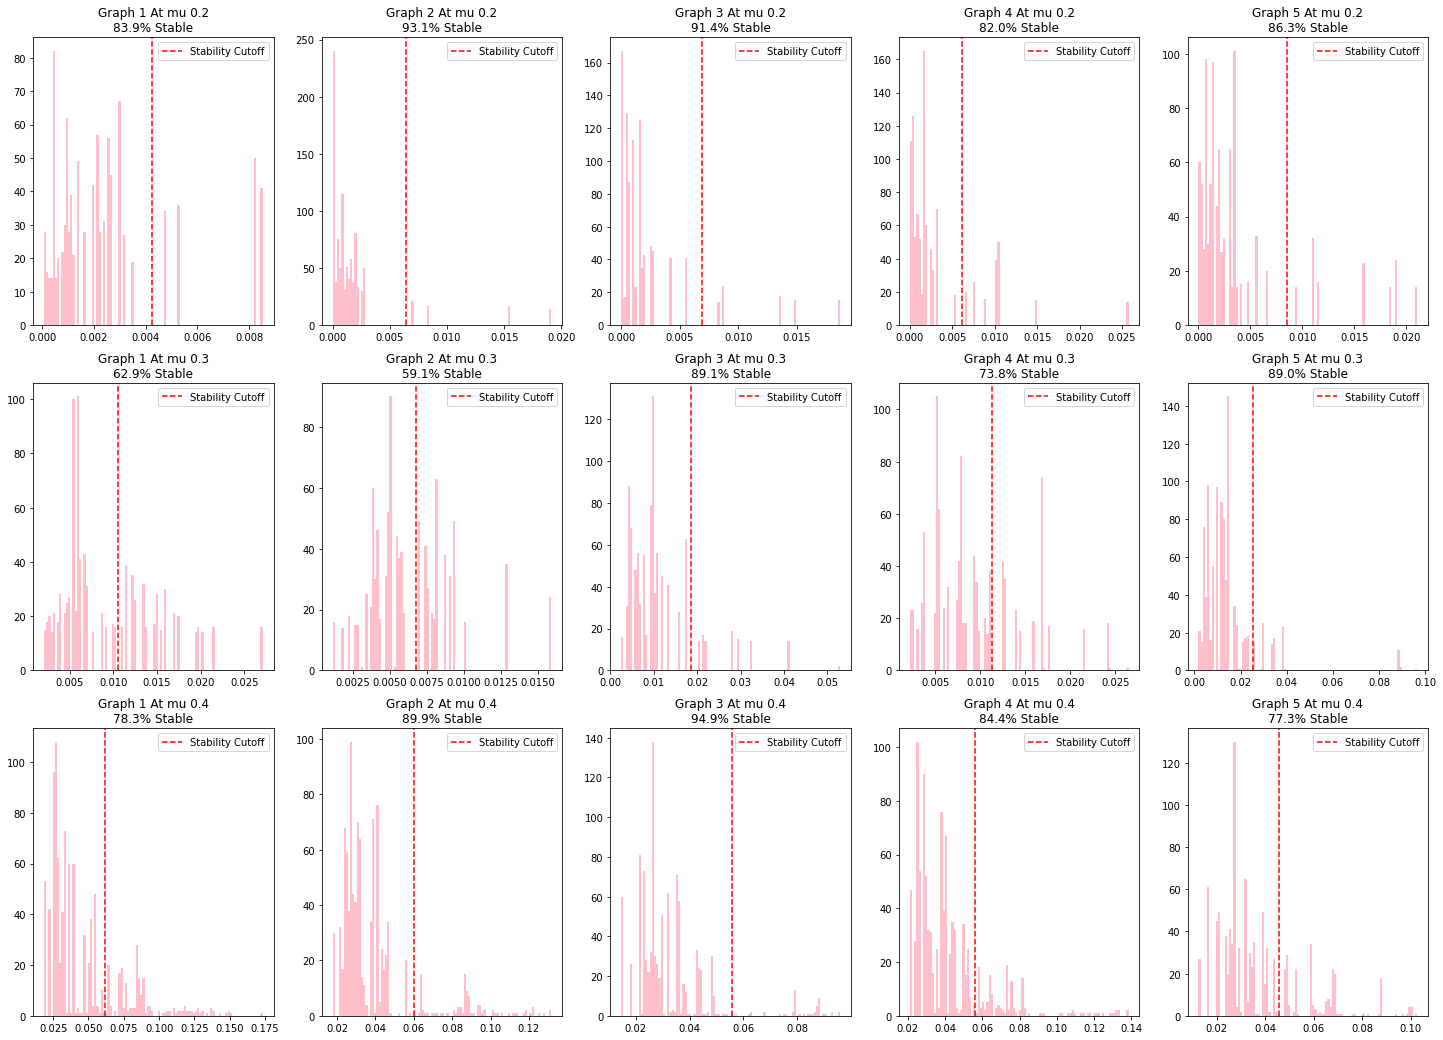

In [6]:
fig = plt.figure(figsize=(25,18))
count = 1
for mu in [2, 3, 4]:
    for graph in [1, 2, 3, 4, 5]:
        ax = fig.add_subplot(3,5,count)
        entrops = pd.read_csv('Community_Data/Louvain/Node_Entropies/graph_0{0}_mu_0_{1}_entropies.csv'.format(graph, mu), 
                              index_col=0)
        entropy_values = np.array(entrops['Entropy'])
        plt.hist(entropy_values, bins=100, color='pink')
        with open('Community_Data/Louvain/Results/mu_0_{0}/graph_0{1}/results'.format(mu, graph), 'rb') as f:
            results = pickle.load(f)
        cutoff = results['Stability Cutoff']
        title = 'Graph {0} At mu 0.{1}'.format(graph, mu)
        stab_prop = results['Stable Nodes']*100 / (results['Stable Nodes'] + results['Unstable Nodes'])
        stab_title = '{0}% Stable'.format(stab_prop)
        ax.set_title(title + '\n' + stab_title)
        plt.axvline(x = cutoff, c='r', linestyle='--', label='Stability Cutoff')
        plt.legend()
        count += 1

In [7]:
for mu in [2, 3, 4]:
    mu_feature_importances = {'Metric': [], 'Value': []}
    for graph in [1, 2, 3, 4, 5]:
        with open('Community_Data/Louvain/Results/mu_0_{0}/graph_0{1}/results'.format(mu, graph), 'rb') as f:
            results = pickle.load(f)
        perm_importances = results['Feature Importances']
        for feat, val in perm_importances.items():
            mu_feature_importances['Metric'].append(feat)
            mu_feature_importances['Value'].append(val)
    mu_feature_importances = pd.DataFrame(data=mu_feature_importances)
    error_bars = alt.Chart(mu_feature_importances).mark_errorbar(extent='ci').encode(
      x=alt.X('Value:Q', scale=alt.Scale(zero=False)),
      y=alt.Y('Metric:N')
    )


    mean_points = alt.Chart(mu_feature_importances).mark_point(filled=True, color='black').encode(
      x=alt.X('Value:Q', aggregate='mean'),
      y=alt.Y('Metric:N'),
    )
    
    median_points = alt.Chart(mu_feature_importances).mark_point(filled=True, color='red').encode(
      x=alt.X('Value:Q', aggregate='median'),
      y=alt.Y('Metric:N'),
    )

    final_plot = (error_bars + mean_points + median_points).properties(
        title='Mu 0.{0}'.format(mu)
    )

    final_plot.display()

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

In [8]:
shapiro_test = {}
for i, met in enumerate(mu_feature_importances['Metric']):
    if met in shapiro_test.keys():
        shapiro_test[met].append(mu_feature_importances['Value'][i])
    else:
        shapiro_test[met] = [mu_feature_importances['Value'][i]]
for met, val_list in shapiro_test.items():
    test_result = shapiro(val_list)
    print(met + ': Statistic =', test_result.statistic, ' P_Value =', test_result.pvalue)
    print('')

Degree: Statistic = 0.910465657711029  P_Value = 0.47039392590522766

Clustering Coefficient: Statistic = 0.8333462476730347  P_Value = 0.14735324680805206

Betweenness: Statistic = 0.9495607018470764  P_Value = 0.7340497374534607

Closeness: Statistic = 0.9024792909622192  P_Value = 0.42374008893966675

Shortest Path: Statistic = 0.9256353974342346  P_Value = 0.5669244527816772

Eigenvector: Statistic = 0.8648998737335205  P_Value = 0.24638044834136963

E In: Statistic = 0.749506950378418  P_Value = 0.02945169247686863

E Out: Statistic = 0.9072964787483215  P_Value = 0.45151564478874207

E In Over E Out: Statistic = 0.9535585641860962  P_Value = 0.7625694274902344

ODF: Statistic = 0.7276849746704102  P_Value = 0.018250716850161552

Expansion: Statistic = 0.8611016869544983  P_Value = 0.23223094642162323

Cut Ratio: Statistic = 0.7511700391769409  P_Value = 0.030513891950249672

Conductance: Statistic = 0.87702476978302  P_Value = 0.2960455119609833

Normalised Cut: Statistic = 0.887

## LPA Final Test

Here we explore the results from the final test of the methodology before the real experiments. First, we look at plots of the entropies and the stability cutoff for each graph.

Then, we look at the permutation importances for each node feature.

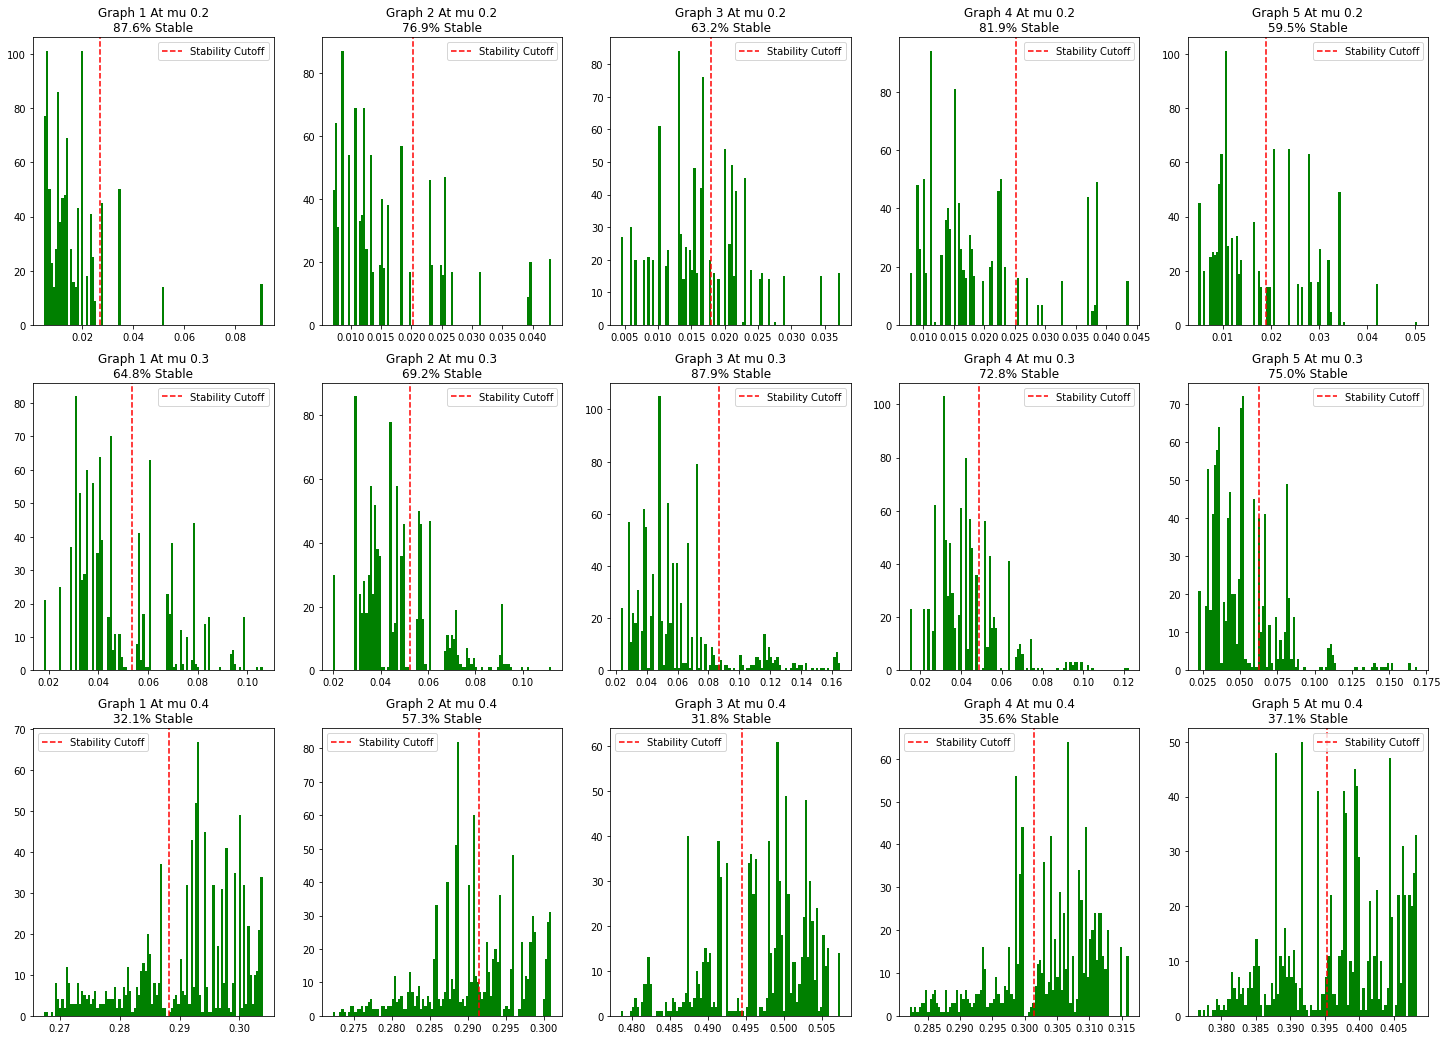

In [9]:
fig = plt.figure(figsize=(25,18))
count = 1
for mu in [2, 3, 4]:
    for graph in [1, 2, 3, 4, 5]:
        ax = fig.add_subplot(3,5,count)
        entrops = pd.read_csv('Community_Data/LPA/Node_Entropies/graph_0{0}_mu_0_{1}_entropies.csv'.format(graph, mu), 
                              index_col=0)
        entropy_values = np.array(entrops['Entropy'])
        plt.hist(entropy_values, bins=100, color='green')
        with open('Community_Data/LPA/Results/mu_0_{0}/graph_0{1}/results'.format(mu, graph), 'rb') as f:
            results = pickle.load(f)
        cutoff = results['Stability Cutoff']
        title = 'Graph {0} At mu 0.{1}'.format(graph, mu)
        stab_prop = results['Stable Nodes']*100 / (results['Stable Nodes'] + results['Unstable Nodes'])
        stab_title = '{0}% Stable'.format(stab_prop)
        ax.set_title(title + '\n' + stab_title)
        plt.axvline(x = cutoff, c='r', linestyle='--', label='Stability Cutoff')
        plt.legend()
        count += 1

In [10]:
for mu in [2, 3, 4]:
    mu_feature_importances = {'Metric': [], 'Value': []}
    for graph in [1, 2, 3, 4, 5]:
        with open('Community_Data/LPA/Results/mu_0_{0}/graph_0{1}/results'.format(mu, graph), 'rb') as f:
            results = pickle.load(f)
        perm_importances = results['Feature Importances']
        for feat, val in perm_importances.items():
            mu_feature_importances['Metric'].append(feat)
            mu_feature_importances['Value'].append(val)
    mu_feature_importances = pd.DataFrame(data=mu_feature_importances)
    error_bars = alt.Chart(mu_feature_importances).mark_errorbar(extent='ci').encode(
      x=alt.X('Value:Q', scale=alt.Scale(zero=False)),
      y=alt.Y('Metric:N')
    )


    mean_points = alt.Chart(mu_feature_importances).mark_point(filled=True, color='black').encode(
      x=alt.X('Value:Q', aggregate='mean'),
      y=alt.Y('Metric:N'),
    )
    
    median_points = alt.Chart(mu_feature_importances).mark_point(filled=True, color='red').encode(
      x=alt.X('Value:Q', aggregate='median'),
      y=alt.Y('Metric:N'),
    )

    final_plot = (error_bars + mean_points + median_points).properties(
        title='Mu 0.{0}'.format(mu)
    )

    final_plot.display()

alt.LayerChart(...)

alt.LayerChart(...)

alt.LayerChart(...)

In [11]:
shapiro_test = {}
for i, met in enumerate(mu_feature_importances['Metric']):
    if met in shapiro_test.keys():
        shapiro_test[met].append(mu_feature_importances['Value'][i])
    else:
        shapiro_test[met] = [mu_feature_importances['Value'][i]]
for met, val_list in shapiro_test.items():
    test_result = shapiro(val_list)
    print(met + ': Statistic =', test_result.statistic, ' P_Value =', test_result.pvalue)
    print('')

Degree: Statistic = 0.9764786958694458  P_Value = 0.9149619936943054

Clustering Coefficient: Statistic = 0.8992415070533752  P_Value = 0.40570735931396484

Betweenness: Statistic = 0.9717405438423157  P_Value = 0.8863031268119812

Closeness: Statistic = 0.9603718519210815  P_Value = 0.810570240020752

Shortest Path: Statistic = 0.9716820120811462  P_Value = 0.8859356641769409

Eigenvector: Statistic = 0.9486469626426697  P_Value = 0.7275190949440002

E In: Statistic = 0.9881898164749146  P_Value = 0.9729756712913513

E Out: Statistic = 0.9024057388305664  P_Value = 0.42332467436790466

E In Over E Out: Statistic = 0.972659707069397  P_Value = 0.8920339345932007

ODF: Statistic = 0.8602414131164551  P_Value = 0.22911635041236877

Expansion: Statistic = 0.8316693902015686  P_Value = 0.1431787610054016

Cut Ratio: Statistic = 0.9120160937309265  P_Value = 0.4798004627227783

Conductance: Statistic = 0.7828928232192993  P_Value = 0.0583527646958828

Normalised Cut: Statistic = 0.825142681